In [20]:
import numpy as np
import pandas as pd
#for comparison
import time
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#importing dataset
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Neural Networks/Gradient Descent/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#drop User Id as we dont need it
del df['User ID']
#dropping gender too, incase to remove bias
del df['Gender']

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.shape

(400, 3)

### Making Training Features and Labels

We will predict either the person has purchased or not based on the Age and Estimated Slary so for that Age and Estimated Salary will be our featues and our Label will be Purchased.

In [8]:
x= df[['Age', 'EstimatedSalary']]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
y= df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Normalizing the dataset to make both feature's value in between 0 and 1 as they have different ranges right now.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

### Designing Neural Network

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
#making the sequential model
model= Sequential()

#adding layers to model
                                        #as we have two features
#hidden layer 1
model.add(Dense(10, activation= 'relu', input_dim= 2))
#hidden layer 2
model.add(Dense(10, activation= 'relu'))
#output layer
model.add(Dense(1, activation= 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compiling and Training model with Batch Gradient Descent

## Stochastic vs Batch in terms of Speed of Completion of Epochs

**Training with Batch Gradient Descent**

In Batch Gradient Descent we will pass the whole dataset which is 400 examples at once to our model and so it will change weight for all examples once according to number of epochs.6

Means if we have 5 epochs it will update weights 5 times.

In [14]:
x_scaled.shape

(400, 2)

In [15]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled,y,epochs=5,batch_size=400)
print('Time taken to complete 5 epochs' , time.time() - start)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.7564 - accuracy: 0.3925
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 0.7414 - accuracy: 0.4300
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 0.7310 - accuracy: 0.4375
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 0.7224 - accuracy: 0.4625
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 0.7150 - accuracy: 0.4800
Time taken to complete 5 epochs 1.3654241561889648


As in above in every epoch 1/1 shows that weights were updated only 1 time.

**Training with Stochastic Gradient Descent**

In this one you will pass 1 example to model at atime and model will change its weights for the every example and in every epoch.
So if we have 5 epochs and 400 example it should update weight 5x400= 2000 times.

So for this Batch Size will be 1.

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(x_scaled,y,epochs=5,batch_size=1)
print('Time taken to complete 5 epochs' , time.time() - start)

Epoch 1/5
400/400 [==============================] - 2s 2ms/step - loss: 0.4906 - accuracy: 0.7625
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8175
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8300
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8425
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8475
Time taken to complete 5 epochs 4.49378514289856


As in above 400/400 shows that in every epoch weights were updated 400 times.

**By comparing the time taken by each Gradient Descent to complete their epochs you can see that Batch gradient Descent is way faster than Stochastic Gradient Descent becuase It Updates less number of weights than Stochastic Gradient Descent in same number of epochs**

## Stochastic vs Batch in terms of Faster Convergence

Now we will compare both in terms of which algorithm reach the optimal solution means where the loss is less and validation accuracy is high in less number of epochs.

**Firstly Lets Train Batch Gradient Descent**

In [17]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_scaled,y,epochs=10,batch_size=400, validation_split= 0.2)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.3205 - accuracy: 0.8406 - val_loss: 0.3547 - val_accuracy: 0.8625
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 0.3172 - accuracy: 0.8406 - val_loss: 0.3563 - val_accuracy: 0.8625
Epoch 3/10
1/1 [==============================] - 0s 60ms/step - loss: 0.3150 - accuracy: 0.8406 - val_loss: 0.3577 - val_accuracy: 0.8625
Epoch 4/10
1/1 [==============================] - 0s 42ms/step - loss: 0.3132 - accuracy: 0.8406 - val_loss: 0.3589 - val_accuracy: 0.8625
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 0.3116 - accuracy: 0.8406 - val_loss: 0.3601 - val_accuracy: 0.8625
Epoch 6/10
1/1 [==============================] - 0s 36ms/step - loss: 0.3102 - accuracy: 0.8406 - val_loss: 0.3612 - val_accuracy: 0.8625
Epoch 7/10
1/1 [==============================] - 0s 39ms/step - loss: 0.3090 - accuracy: 0.8406 - val_loss: 0.3623 - val_accuracy: 0.8625
Epoch 8/10
1/1 [=============

In 10 epoch Batch Gradient Descent has reached at 0.86 of Validation Acuracy.

**Now Training Stochastic Gradient Descent**

In [18]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_scaled,y,epochs=10,batch_size=1, validation_split= 0.2)

Epoch 1/10
320/320 [==============================] - 2s 4ms/step - loss: 0.3065 - accuracy: 0.8438 - val_loss: 0.3623 - val_accuracy: 0.8750
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3083 - accuracy: 0.8375 - val_loss: 0.3606 - val_accuracy: 0.8625
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.8469 - val_loss: 0.3545 - val_accuracy: 0.8625
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8562 - val_loss: 0.3499 - val_accuracy: 0.9000
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2929 - accuracy: 0.8625 - val_loss: 0.3468 - val_accuracy: 0.9250
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2865 - accuracy: 0.8656 - val_loss: 0.3345 - val_accuracy: 0.9125
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2839 - accuracy: 0.8687 - val_loss: 0.3195 - val_accuracy: 0.9125
Epoch 

And in 10 epochs Stochastic Gradient Descent reached at validation score of 0.93.

**This means that Batch will require more epochs to reach at 0.93 than Stochastic, So Stochastic is faster in convergence.**

**This is usually due to fact that stochastic gradient descent calculates more weights than Batch in every epoch that is why it converge faster**

## Stochastic vs Batch in terms of how they Converge

So we will plot the loss of both Algorithms to see how they reach to opotimal solution means their minimum loss.

**Training Stochastic Gradient Descent**

In [27]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_scaled,y,epochs=100,batch_size=1,validation_split=0.2)

Epoch 1/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9094 - val_loss: 0.2727 - val_accuracy: 0.9125
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 0.2441 - accuracy: 0.9094 - val_loss: 0.2639 - val_accuracy: 0.9125
Epoch 3/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9125 - val_loss: 0.2657 - val_accuracy: 0.9125
Epoch 4/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.9125 - val_loss: 0.2548 - val_accuracy: 0.9125
Epoch 5/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2762 - accuracy: 0.9094 - val_loss: 0.2432 - val_accuracy: 0.9250
Epoch 6/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.9125 - val_loss: 0.2244 - val_accuracy: 0.9375
Epoch 7/100
320/320 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.9094 - val_loss: 0.2509 - val_accuracy: 0.9125

Lets plot the loss for the Stochastic gradient descent.

Text(0, 0.5, 'Loss')

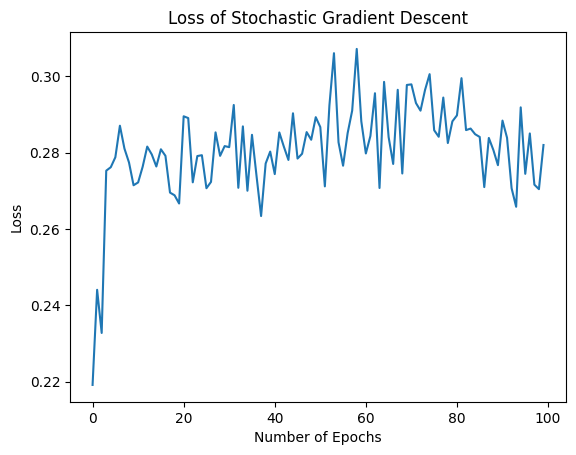

In [28]:
plt.plot(history.history['loss'])
plt.title('Loss of Stochastic Gradient Descent')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

**Training Batch Gradient Descent**

In [29]:
model.compile(loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_scaled,y,epochs=100,batch_size=320,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.2629 - accuracy: 0.9125 - val_loss: 0.2546 - val_accuracy: 0.9125
Epoch 2/100
1/1 [==============================] - 0s 85ms/step - loss: 0.2517 - accuracy: 0.9156 - val_loss: 0.2635 - val_accuracy: 0.9250
Epoch 3/100
1/1 [==============================] - 0s 69ms/step - loss: 0.2458 - accuracy: 0.9156 - val_loss: 0.2719 - val_accuracy: 0.9250
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 0.2420 - accuracy: 0.9187 - val_loss: 0.2795 - val_accuracy: 0.9125
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2388 - accuracy: 0.9187 - val_loss: 0.2865 - val_accuracy: 0.9125
Epoch 6/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2361 - accuracy: 0.9156 - val_loss: 0.2917 - val_accuracy: 0.9250
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2333 - accuracy: 0.9156 - val_loss: 0.2979 - val_accuracy: 0.9250
Epoch 8/100
1/1 [=====

Loss of Batch Gradient Descent

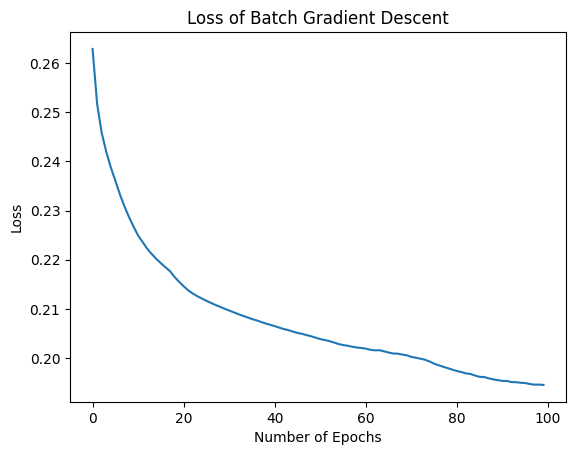

In [30]:
plt.plot(history.history['loss'])
plt.title('Loss of Batch Gradient Descent')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

**It is pretty smooth and does not have the spikes, it is because of the fact that weights are updated in less frequencey in batch so loss is updated for the less number of times.**